In [1]:
import numpy as np
from scio import scio
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, "/home/mohan/Projects/")
from albatros_analysis.src.utils import baseband_utils as butils
from astropy.time import Time
from astropy.coordinates import EarthLocation
import datetime
import os
from scipy.ndimage import median_filter

In [2]:
str2time = lambda tstr: int(datetime.datetime.strptime(tstr, "%Y%m%d").timestamp())
def unix2jd(ctime):
    return ctime / 86400 + 2440587.5

In [3]:
with np.load("uapishka_50_5.npz") as f:
    med_uapishka = f["median"]
med_uapishka_mf = median_filter(med_uapishka, size=5,mode='nearest',axes=1)

In [66]:
with np.load("mars_50_5.npz") as f:
    med_mars = f["median"]
med_mars_mf = median_filter(med_mars, size=5,mode='nearest',axes=1)

(6.5, 8.5)

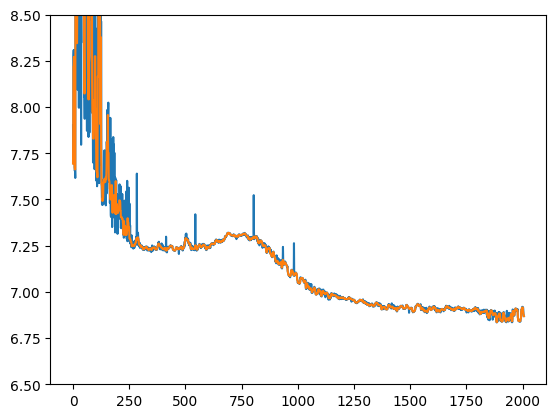

In [13]:
plt.plot(np.log10(med_uapishka)[41:])
plt.plot(np.log10(med_uapishka_mf)[41:])
plt.ylim(6.5,8.5)

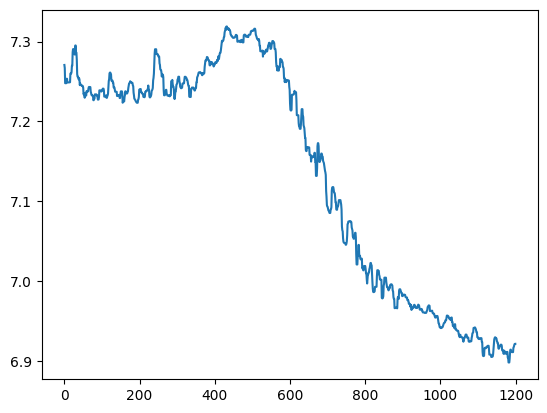

In [30]:
# plt.plot(np.log10(med_uapishka)[300:1500])
plt.plot(np.log10(med_uapishka_mf)[300:1500])
# plt.ylim(6.5,8.5)

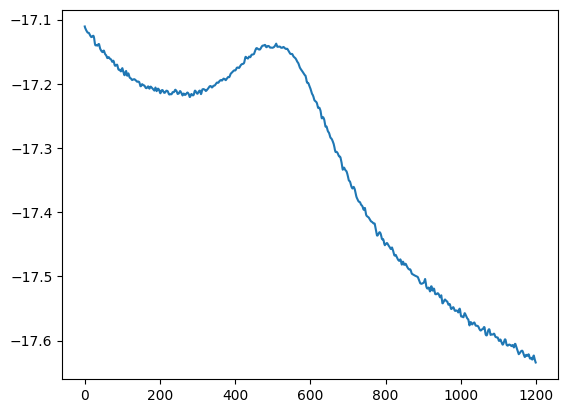

In [42]:
plt.plot(np.log10(snap_interp*(alb_power_interp+alb_noise_interp))[300-41:1500-41])
# plt.ylim(6.5,8.5)

In [39]:
len(alb_power_interp)

2007

In [ ]:
plt.plot(np.log10(med_uapishka_mf)[300:1500])

In [6]:
ff=np.linspace(0,125,2048)

In [11]:
ff[41]

np.float64(2.5036638983878845)

In [23]:
ff[600]

np.float64(36.63898387884709)

In [40]:
with np.load("/home/mohan/Projects/fee-analysis/paper-scripts/signal_noise_forecast.npz") as f:
    freqs=f['freq']
    alb_power=f['signal']
    noise_alb = f['noise']
    snap = f['snap']
alb_power_interp=np.interp(ff[41:],freqs,alb_power)
alb_noise_interp=np.interp(ff[41:],freqs,noise_alb)

snap=median_filter(snap, size=10,mode='nearest',axes=1)
snap1=snap.copy()
snap1[600:]=1
snap_interp=np.interp(ff[41:],freqs,snap1)

(0.9, 1.1)

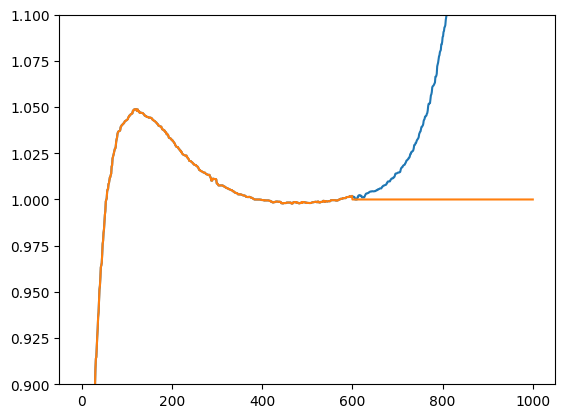

In [25]:
snap1=snap.copy()
snap1[600:]=1
plt.plot(snap)
plt.plot(snap1)
plt.ylim(0.9,1.1)

In [49]:
pred = snap_interp*(alb_power_interp+alb_noise_interp)

In [52]:
# x=alb_power_interp[300-41:1500-41].copy() #+ alb_noise_interp[300:1000].copy()
x=pred[300-41:1500-41].copy()
y=med_uapishka_mf[300:1500].copy()
A=np.zeros((len(y),2),dtype='float64')
A[:,0]=x
A[:,1]=1
norm=np.linalg.inv(A.T@A)
m,c=np.dot(norm,A.T@y)

In [53]:
m,c

(np.float64(2.4197930582758046e+24), np.float64(2227198.010946414))

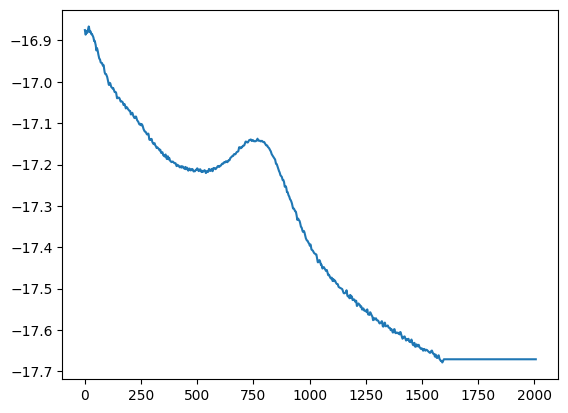

In [51]:
plt.plot(np.log10(pred))

In [64]:
f1=scio.read('/home/mohan/Projects/fee-analysis/fee-measurements-2024/mar_13_2025_measurements/mohan_test/data_auto_cross/17420/1742074857/pol00.scio.bz2')
f2=scio.read('/home/mohan/Projects/fee-analysis/fee-measurements-2024/mar_13_2025_measurements/mohan_test/data_auto_cross/17420/1742079062/pol00.scio.bz2')
f3=scio.read('/home/mohan/Projects/fee-analysis/fee-measurements-2024/mar_13_2025_measurements/mohan_test/data_auto_cross/17420/1742081211/pol00.scio.bz2')

attn16dB = median_filter(np.median(f1,axis=0), size=5,mode='nearest',axes=1)
attn9dB = median_filter(np.median(f2,axis=0), size=5,mode='nearest',axes=1)
attn0dB = median_filter(np.median(f3,axis=0), size=5,mode='nearest',axes=1)


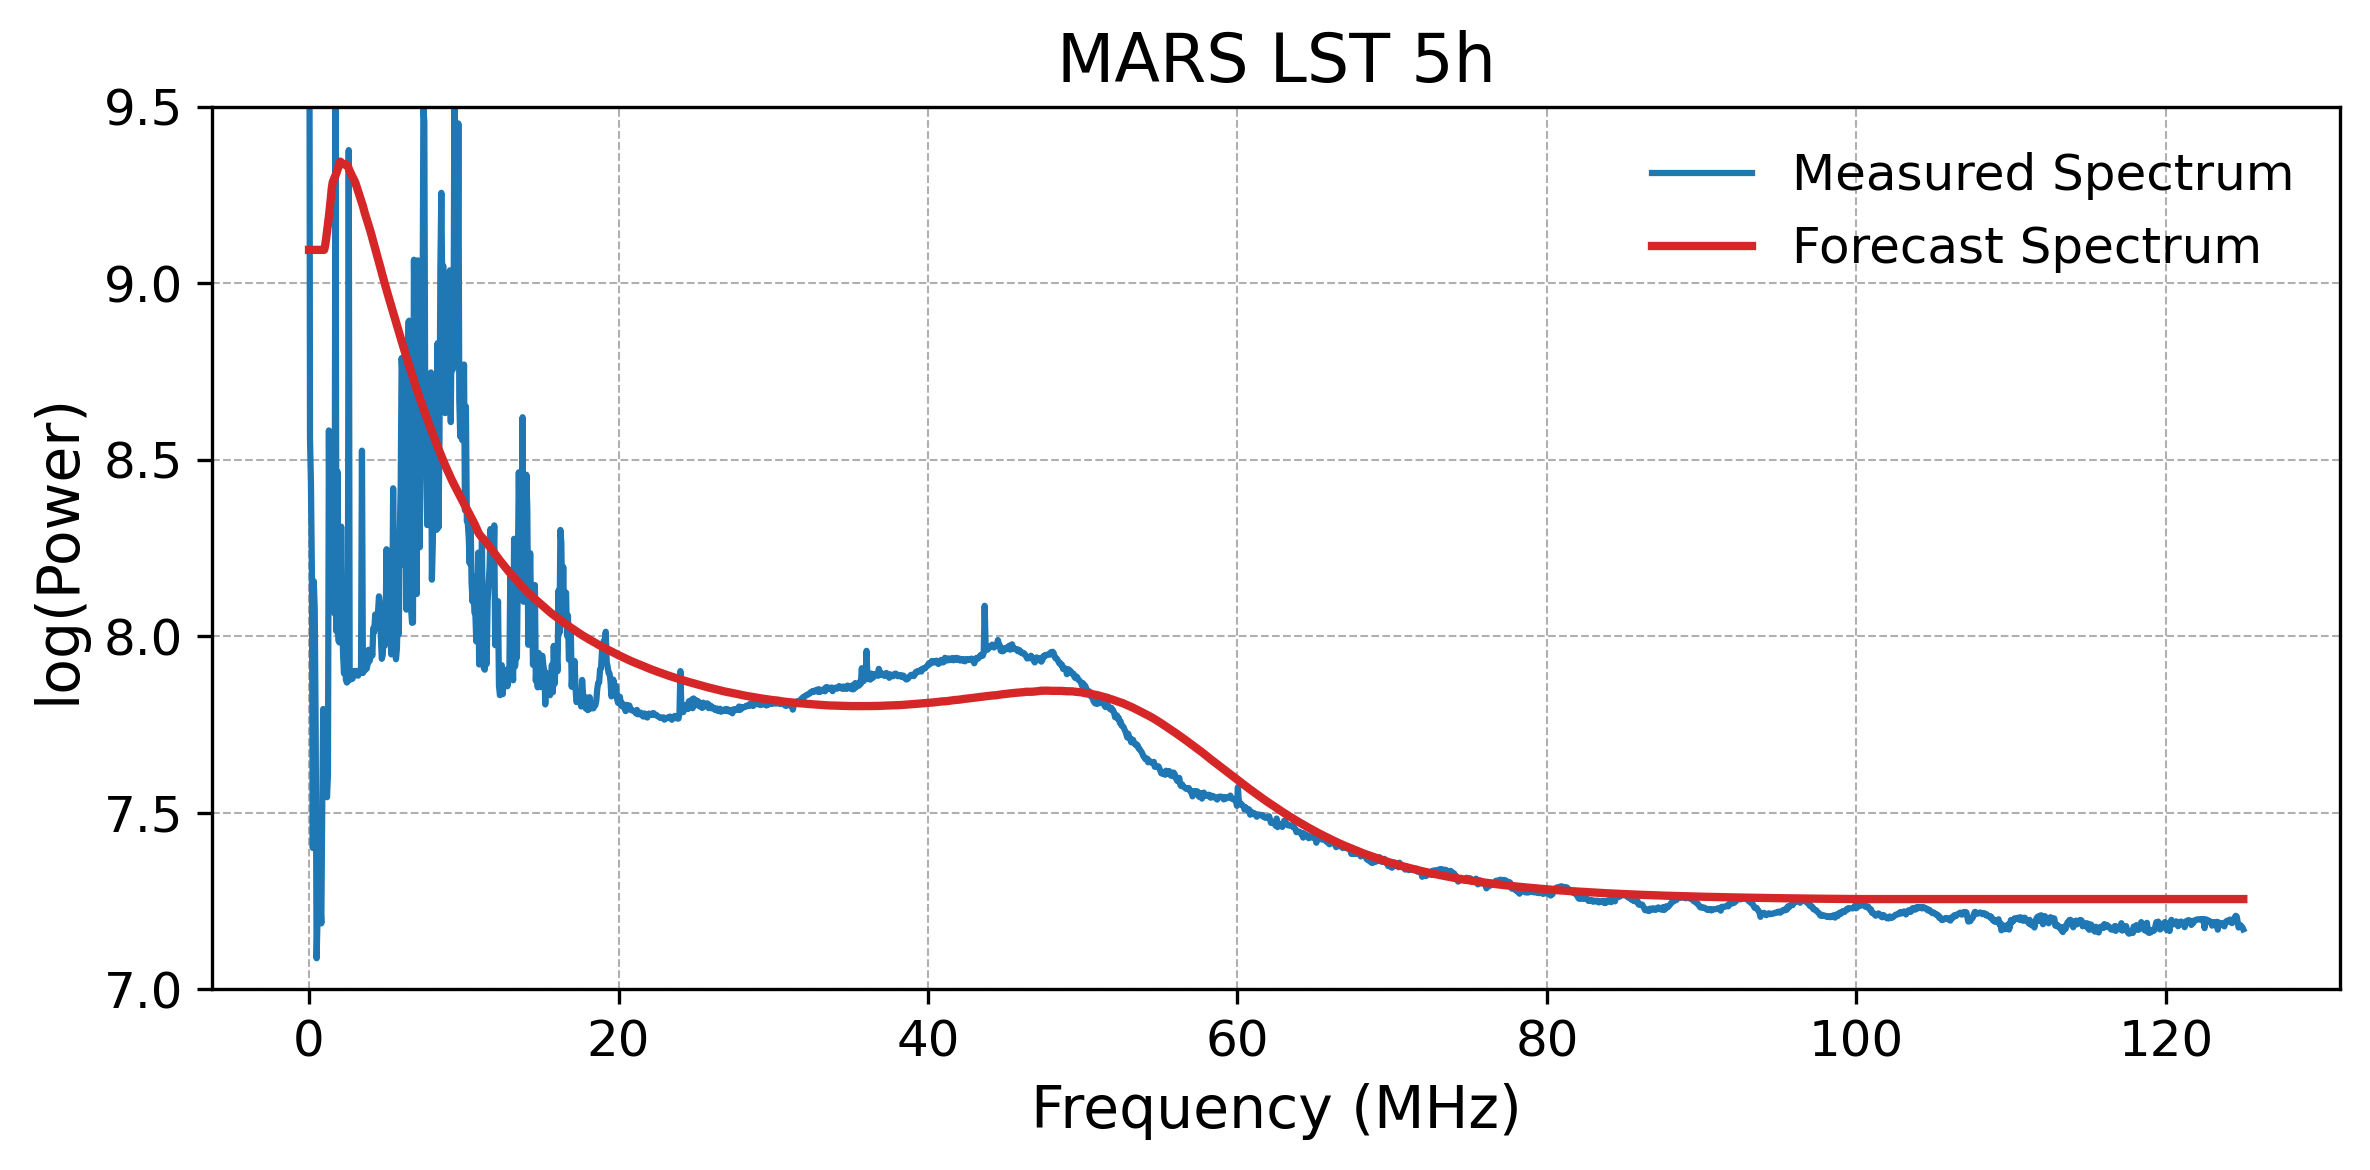

In [25]:
plt.figure(figsize=(8, 4), dpi=300)

plt.plot(ff, np.log10(bot5[:]), label='Measured Spectrum', color='#1f77b4', linewidth=1.5)
plt.plot(ff, np.log10(m * alb_power_interp[:] + c), label='Forecast Spectrum', color='#d62728', linewidth=2)

plt.xlabel("Frequency (MHz)", fontsize=14)
plt.ylabel(r"log(Power)", fontsize=14)
plt.title("MARS LST 5h", fontsize=16)

plt.ylim(7, 9.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

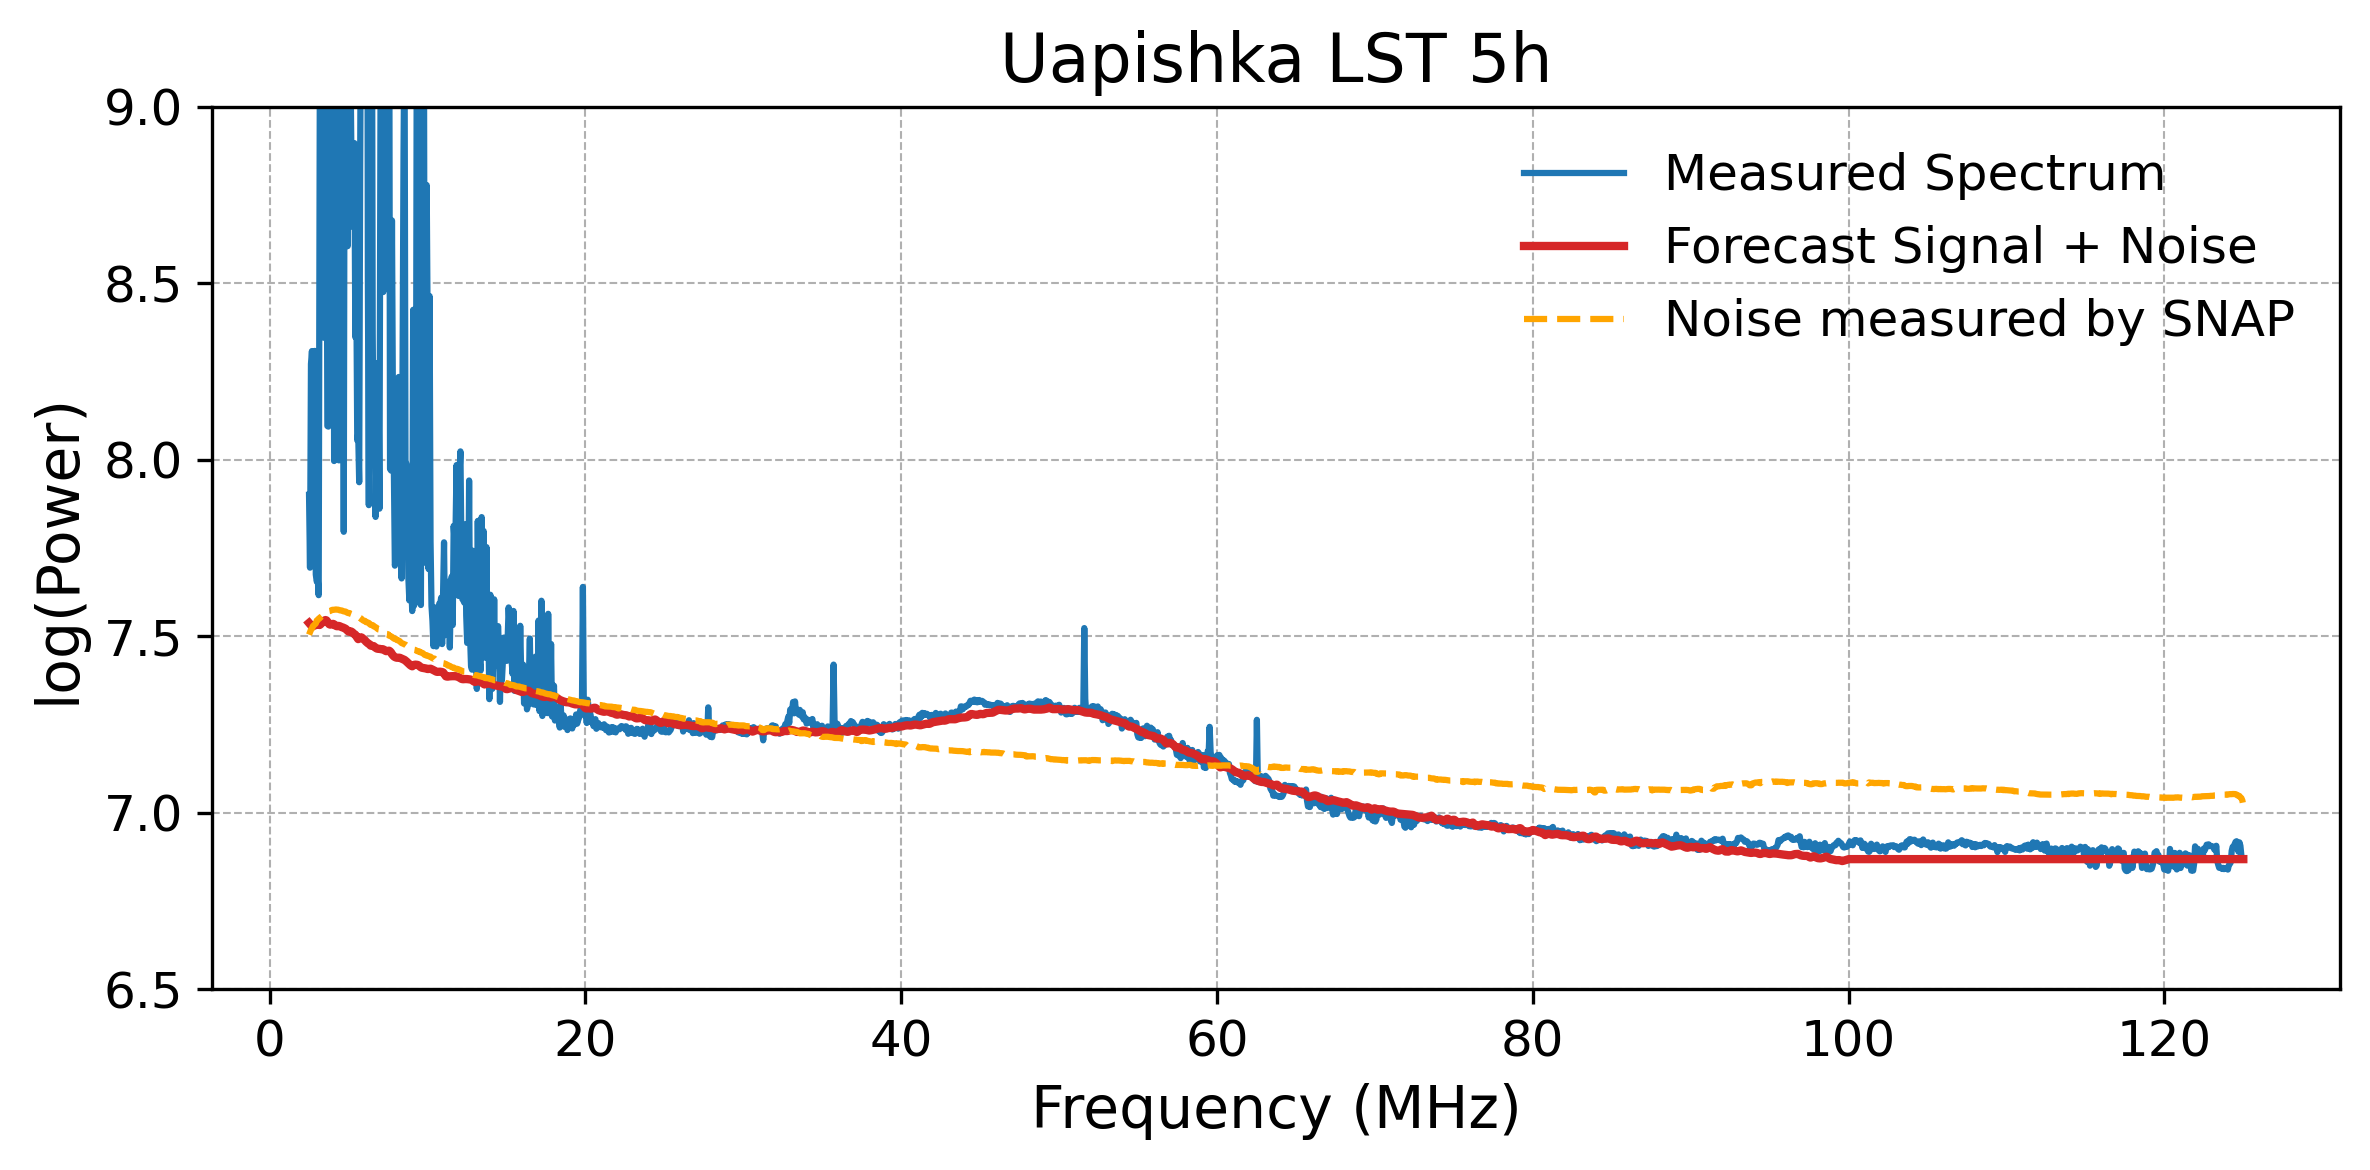

In [81]:
plt.figure(figsize=(8, 4), dpi=300)

plt.plot(ff[41:], np.log10(med_uapishka[41:]), label='Measured Spectrum', color='#1f77b4', linewidth=1.5)
plt.plot(ff[41:], np.log10(m * pred + c), label='Forecast Signal + Noise', color='#d62728', linewidth=2)
plt.plot(ff[41:], np.log10(attn16dB)[41:], label='Noise measured by SNAP', color='orange', linewidth=1.5,ls='--')

plt.xlabel("Frequency (MHz)", fontsize=14)
plt.ylabel(r"log(Power)", fontsize=14)
plt.title("Uapishka LST 5h", fontsize=16)

plt.ylim(6.5, 9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

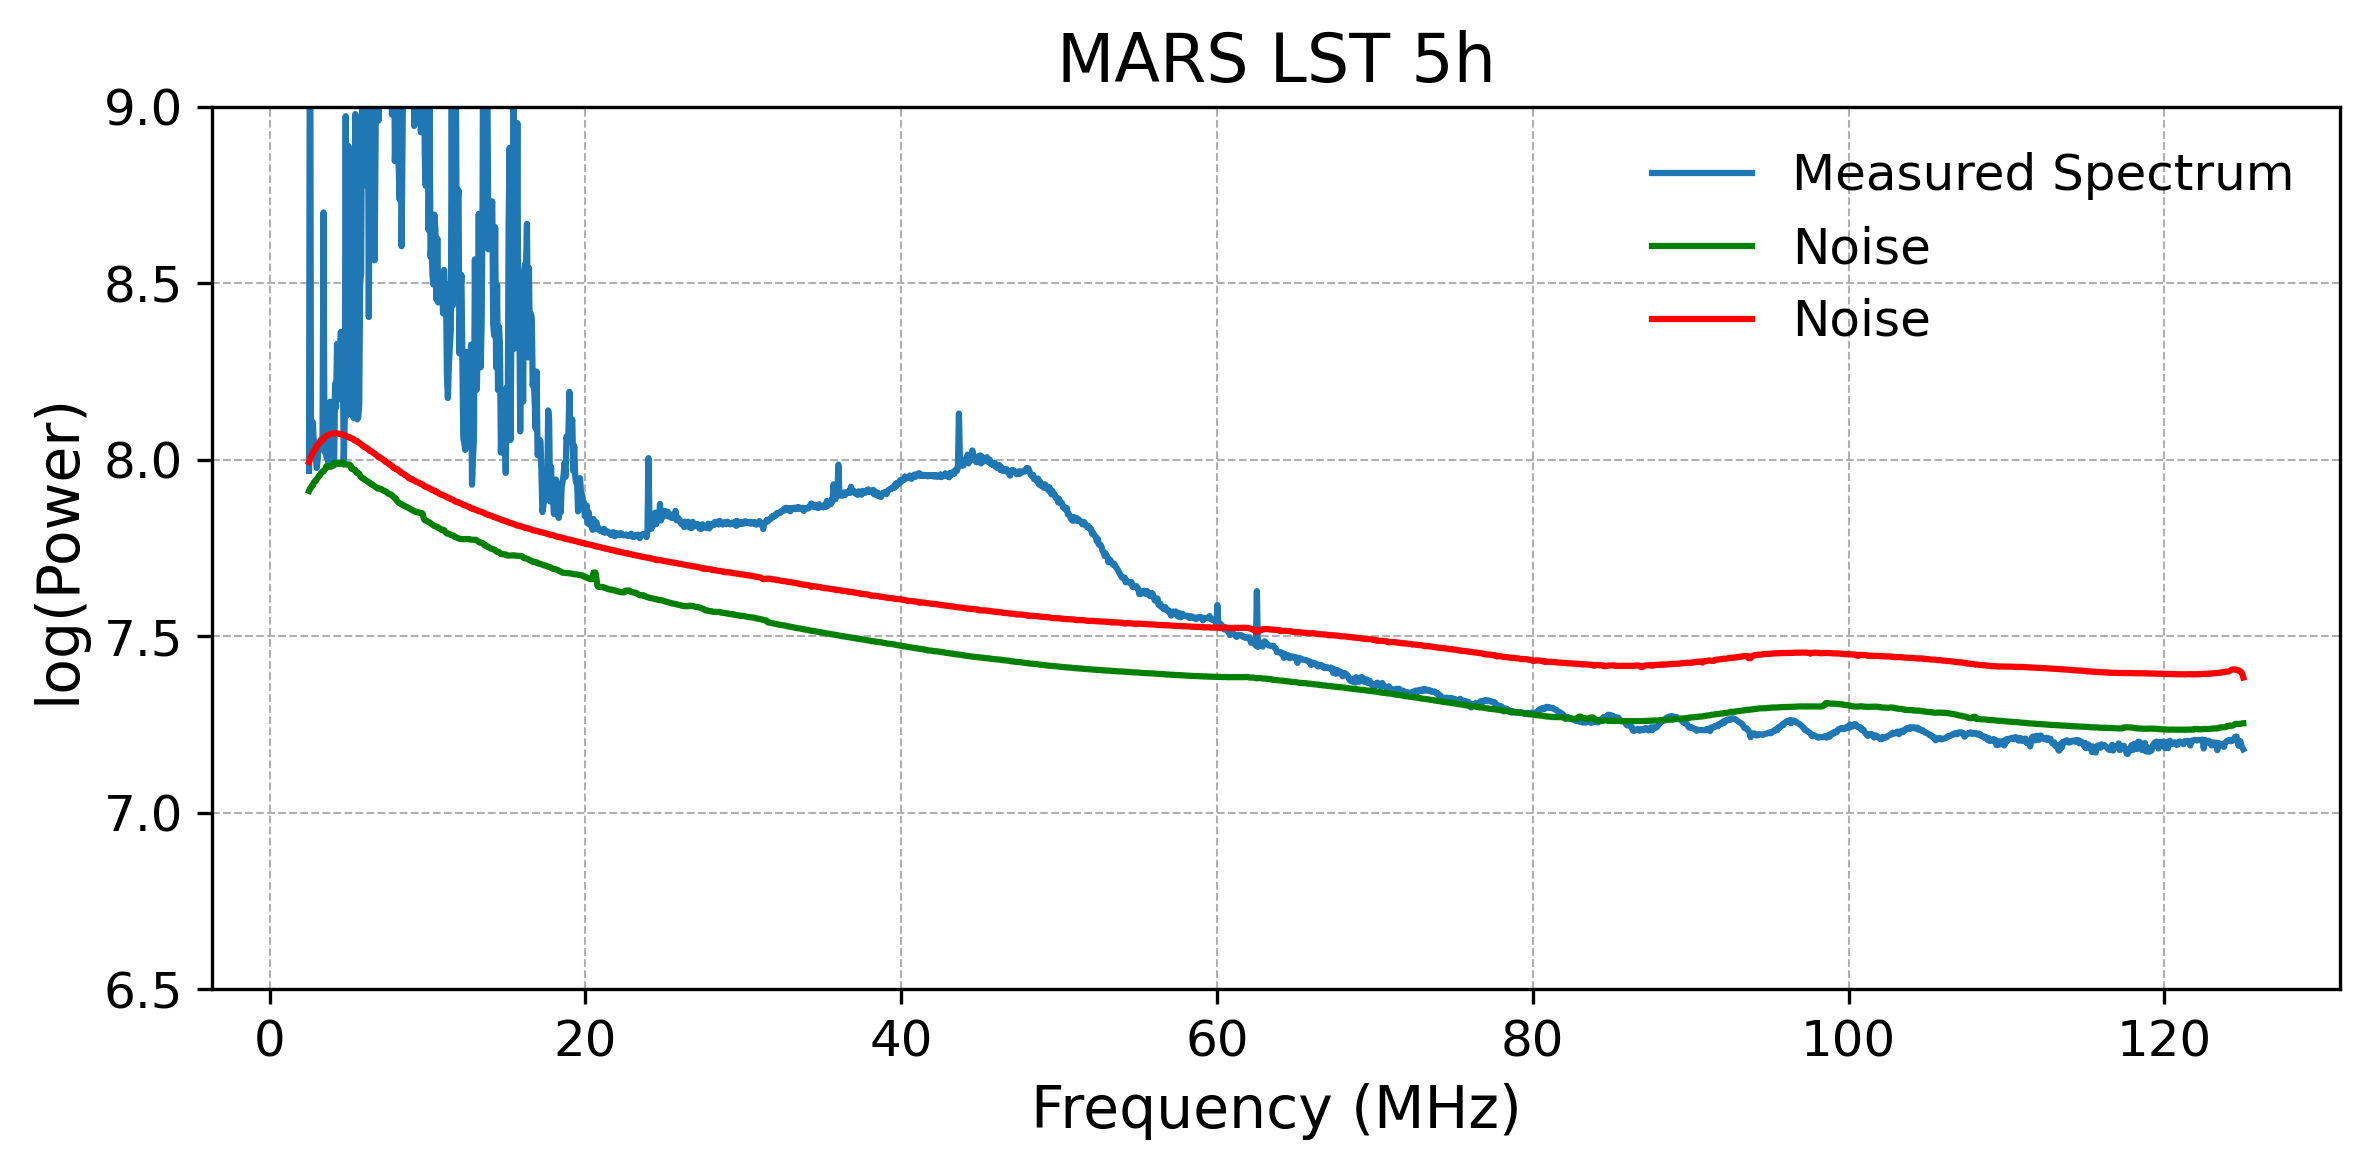

In [70]:
plt.figure(figsize=(8, 4), dpi=300)

plt.plot(ff[41:], np.log10(med_mars_mf[41:]), label='Measured Spectrum', color='#1f77b4', linewidth=1.5)
# plt.plot(ff[41:], np.log10(m * pred + c), label='Forecast Signal + Noise', color='#d62728', linewidth=2)
plt.plot(ff[41:], np.log10(attn0dB)[41:]-0.9, label='Noise', color='green', linewidth=1.5)
plt.plot(ff[41:], np.log10(attn9dB)[41:], label='Noise', color='red', linewidth=1.5)

plt.xlabel("Frequency (MHz)", fontsize=14)
plt.ylabel(r"log(Power)", fontsize=14)
plt.title("MARS LST 5h", fontsize=16)

plt.ylim(6.5, 9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()